국내도서의  소설, 시, 희곡 스테디셀러 영역으로 가서 팝업창 닫기

In [141]:
# !pip install undetected-chromedriver
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

driver = uc.Chrome()
driver.get("https://www.yes24.com/Product/Category/SteadySeller?categoryNumber=001001046")
time.sleep(1)
driver.find_element(By.CLASS_NAME, "pBtn").click()  # 닫을때 click

전체페이지(총 42페이지)에서의

-책 제목  
-작가  
-출판일  
-회원리뷰수    
-별점  
-AI 리뷰요약  
-해시태그  
-링크  

In [101]:
box = []

for i in driver.find_elements(By.CSS_SELECTOR, "#yesBestList > li"):
    title = (i.find_element(By.CSS_SELECTOR, "a.gd_name").text.strip())
    author = (i.find_element(By.CSS_SELECTOR, "span.authPub.info_auth").text.strip().rstrip(" 저"))
    date = (i.find_element(By.CSS_SELECTOR, "span.authPub.info_date").text.strip())
    review = (i.find_element(By.CSS_SELECTOR, "em.txC_blue").text.strip())
    star = (i.find_element(By.CSS_SELECTOR, "span.rating_grade").find_element(By.CSS_SELECTOR, "em.yes_b").text.strip())
    # AI 리뷰요약?
    hashtag_element = (i.find_elements(By.CSS_SELECTOR, "div.info_row.info_tag"))
    hashtag = hashtag_element[0].text.strip() if hashtag_element else ""
    link = (i.find_element(By.CSS_SELECTOR, "a.gd_name").get_attribute("href"))
    box.append([title, author, date, review, star, hashtag, link])
box

[['소년이 온다',
  '한강',
  '2014년 05월',
  '3,725',
  '9.7',
  '#해외문학상_우리작가\n#노벨문학상수상작가\n#가을에어울리는책\n#알쓸범잡\n#KBS우리시대의소설',
  'https://www.yes24.com/Product/Goods/13137546'],
 ['채식주의자',
  '한강',
  '2022년 03월',
  '1,477',
  '9.1',
  '#노벨문학상수상작가\n#뉴욕타임즈_21세기_100대도서\n#해외문학상_우리작가\n#TV책을보다선정도서\n#해외에서인기있는한국소설',
  'https://www.yes24.com/Product/Goods/108422348'],
 ['작별하지 않는다',
  '한강',
  '2021년 09월',
  '1,921',
  '9.6',
  '#스트레이키즈현진이읽은책\n#내별의책장_스트레이키즈\n#노벨문학상수상작가\n#2022리딩코리아추천도서\n#해외문학상_우리작가',
  'https://www.yes24.com/Product/Goods/103495056'],
 ['서랍에 저녁을 넣어 두었다',
  '한강',
  '2013년 11월',
  '719',
  '9.7',
  '#해외문학상_우리작가\n#노벨문학상수상작가\n#가을에시한편\n#시시한게좋아\n#숲속의작은집',
  'https://www.yes24.com/Product/Goods/11467936'],
 ['흰',
  '한강 저/최진혁 사진',
  '2018년 04월',
  '578',
  '9.7',
  '#해외문학상_우리작가\n#노벨문학상수상작가\n#부커상후보작\n#해외에서인기있는한국소설',
  'https://www.yes24.com/Product/Goods/60524285'],
 ['모순',
  '양귀자',
  '2013년 04월',
  '1,340',
  '9.6',
  '#예스미츠에소개된책\n#스트레이키즈현진이읽은책\n#내별의책장_스트레이키즈\n#삶의의미\n#삶을노래하다',
  'https://www.yes24.com

In [146]:
import warnings
warnings.filterwarnings("ignore")
from selenium.common.exceptions import NoSuchElementException

box = []
driver = uc.Chrome()

# 전체 페이지 반복 (1부터 42까지)
for page in range(1, 43):  
    url = f"https://www.yes24.com/Product/Category/SteadySeller?pageNumber={page}&pageSize=24&categoryNumber=001"
    driver.get(url)
    time.sleep(0.5) 
    
    if page == 1:
        try:
            driver.find_element(By.CLASS_NAME, "pBtn").click()
            time.sleep(1)
        except:
            pass 
            
    for i in driver.find_elements(By.CSS_SELECTOR, "#yesBestList > li"):
        title = (i.find_element(By.CSS_SELECTOR, "a.gd_name").text.strip())
        author = (i.find_element(By.CSS_SELECTOR, "span.authPub.info_auth").text.strip().rstrip(" 저"))
        date = (i.find_element(By.CSS_SELECTOR, "span.authPub.info_date").text.strip())

        try:
            review_element = i.find_element(By.CSS_SELECTOR, "em.txC_blue")
            review = review_element.text.strip()
        except NoSuchElementException:
            review = "0" 
        
        try:
            star_element = i.find_element(By.CSS_SELECTOR, "span.rating_grade em.yes_b")
            star = star_element.text.strip()
        except NoSuchElementException:
            star = "0.0"
        
        hashtag_element = (i.find_elements(By.CSS_SELECTOR, "div.info_row.info_tag"))
        hashtag = hashtag_element[0].text.strip() if hashtag_element else ""
        
        link = (i.find_element(By.CSS_SELECTOR, "a.gd_name").get_attribute("href"))
        
        box.append([title, author, date, review, star, hashtag, link])
    
    print(f"{page}페이지 수집 완료")

1페이지 수집 완료
2페이지 수집 완료
3페이지 수집 완료
4페이지 수집 완료
5페이지 수집 완료
6페이지 수집 완료
7페이지 수집 완료
8페이지 수집 완료
9페이지 수집 완료
10페이지 수집 완료
11페이지 수집 완료
12페이지 수집 완료
13페이지 수집 완료
14페이지 수집 완료
15페이지 수집 완료
16페이지 수집 완료
17페이지 수집 완료
18페이지 수집 완료
19페이지 수집 완료
20페이지 수집 완료
21페이지 수집 완료
22페이지 수집 완료
23페이지 수집 완료
24페이지 수집 완료
25페이지 수집 완료
26페이지 수집 완료
27페이지 수집 완료
28페이지 수집 완료
29페이지 수집 완료
30페이지 수집 완료
31페이지 수집 완료
32페이지 수집 완료
33페이지 수집 완료
34페이지 수집 완료
35페이지 수집 완료
36페이지 수집 완료
37페이지 수집 완료
38페이지 수집 완료
39페이지 수집 완료
40페이지 수집 완료
41페이지 수집 완료
42페이지 수집 완료


In [147]:
import pandas as pd
df = pd.DataFrame(box, columns = ["제목","작가","출판일","리뷰수","별점","해시태그", "링크"])
df

,제목,작가,출판일,리뷰수,별점,해시태그,링크
0,소년이 온다,한강,2014년 05월,"3,725",9.7,#해외문학상_우리작가\n#노벨문학상수상작가\n#가을에어울리는책\n#알쓸범잡\n#KB...,https://www.yes24.com/Product/Goods/13137546
1,채식주의자,한강,2022년 03월,"1,477",9.1,#노벨문학상수상작가\n#뉴욕타임즈_21세기_100대도서\n#해외문학상_우리작가\n#...,https://www.yes24.com/Product/Goods/108422348
2,작별하지 않는다,한강,2021년 09월,"1,921",9.6,#스트레이키즈현진이읽은책\n#내별의책장_스트레이키즈\n#노벨문학상수상작가\n#202...,https://www.yes24.com/Product/Goods/103495056
3,서랍에 저녁을 넣어 두었다,한강,2013년 11월,719,9.7,#해외문학상_우리작가\n#노벨문학상수상작가\n#가을에시한편\n#시시한게좋아\n#숲속...,https://www.yes24.com/Product/Goods/11467936
4,흰,한강 저/최진혁 사진,2018년 04월,578,9.7,#해외문학상_우리작가\n#노벨문학상수상작가\n#부커상후보작\n#해외에서인기있는한국소설,https://www.yes24.com/Product/Goods/60524285
...,...,...,...,...,...,...,...
995,나와 너의 365일,유이하 저/김지연 역,2023년 03월,59,9.8,#봄날엔로맨스,https://www.yes24.com/Product/Goods/117945784
996,어린이 훈민정음 3-2,성정일,2018년 08월,117,9.8,#분철,https://www.yes24.com/Product/Goods/64088226
997,못 참는 아이 욱하는 부모 (50만 부 발매 기념 리커버 에디션),오은영,2016년 05월,"1,422",9.7,#올해의책\n#가족관계심리학\n#화내지않고아이키우기\n#부모교육\n#자녀교육,https://www.yes24.com/Product/Goods/26031499
998,스즈키 바이올린 교본 4,편집부,2011년 08월,90,9.8,#악기,https://www.yes24.com/Product/Goods/5533358


In [164]:
hashtags = df["해시태그"][0].replace("\n", "#").split("#")
hashtags = [tag.strip() for tag in hashtags if tag.strip()]
hashtags

['해외문학상_우리작가', '노벨문학상수상작가', '가을에어울리는책', '알쓸범잡', 'KBS우리시대의소설']

In [168]:
tag = []
for i in range(1000):
    hashtags = df["해시태그"][i].replace("\n", "#").split("#")
    hashtags = [tag.strip() for tag in hashtags if tag.strip()]
    tag.extend(hashtags)  # 리스트를 확장하여 추가

tag

['해외문학상_우리작가',
 '노벨문학상수상작가',
 '가을에어울리는책',
 '알쓸범잡',
 'KBS우리시대의소설',
 '노벨문학상수상작가',
 '뉴욕타임즈_21세기_100대도서',
 '해외문학상_우리작가',
 'TV책을보다선정도서',
 '해외에서인기있는한국소설',
 '스트레이키즈현진이읽은책',
 '내별의책장_스트레이키즈',
 '노벨문학상수상작가',
 '2022리딩코리아추천도서',
 '해외문학상_우리작가',
 '해외문학상_우리작가',
 '노벨문학상수상작가',
 '가을에시한편',
 '시시한게좋아',
 '숲속의작은집',
 '해외문학상_우리작가',
 '노벨문학상수상작가',
 '부커상후보작',
 '해외에서인기있는한국소설',
 '올해의책',
 '부자되는법',
 '부자만들기',
 '돈좀벌어보자',
 '돈모으고싶을때',
 '올해의책',
 '성공신화',
 '성공하고싶다면',
 '삶이고민될때',
 '인생지침서',
 '분철',
 '신유형반영',
 '연습을실전처럼',
 '단기간고득점',
 '너만알려줄게고득점비법',
 '분철',
 '신유형반영',
 '연습을실전처럼',
 '단기간고득점',
 '너만알려줄게고득점비법',
 '예스미츠에소개된책',
 '스트레이키즈현진이읽은책',
 '내별의책장_스트레이키즈',
 '삶의의미',
 '삶을노래하다',
 '해외문학상_우리작가',
 '노벨문학상수상작가',
 '마흔즈음에',
 '아포리즘',
 '팩트폭행인생조언',
 '나이인문학',
 '철학자의인생론',
 '올해의책',
 '뉴욕타임즈_21세기_100대도서',
 '영화드라마원작',
 '문학뉴스레터에소개된책',
 '사랑의의미',
 '북클러버의선택',
 '2021우량투자서35선',
 '주식투자입문',
 '돈며들다',
 '주식투자',
 '영어덜트소설',
 '문학으로보는역사',
 '그래제본소',
 '크레마클럽에있어요',
 '빨간책방',
 '이달의굿즈',
 '사랑의힘',
 '사랑의형태',
 '대장금_출판사대표추천도서',
 '독서지도안',
 '북클러버의선택',
 '2022아침독서추천도서',
 '내맘대로올해의책',
 '

In [192]:
from collections import Counter

# 해시태그 개수 세기
tag_counts = Counter(tag)

# 결과 출력
tag_counts.head()

AttributeError: 'Counter' object has no attribute 'head'

In [186]:
# 등장 횟수가 많은 순으로 정렬
sorted_tags = sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)

# DataFrame으로 변환 (선택 사항)
import pandas as pd
df_tags = pd.DataFrame(sorted_tags, columns=["해시태그", "빈도수"])

df_tags = df_tags.head(15)
print(df_tags)


               해시태그  빈도수
0                분철  110
1         크레마클럽에있어요   95
2             독서지도안   68
3              올해의책   46
4            배송비채우기   34
5           북클러버의선택   32
6              책읽아웃   30
7        해외문학상_우리작가   26
8              서탐대실   24
9       문학뉴스레터에소개된책   21
10     내별의책장_스트레이키즈   20
11  국립어린이청소년도서관사서추천   20
12           왼손은거들뿐   20
13            스포츠만화   20
14        노벨문학상수상작가   19


In [182]:
# 데이터 시각화가 왜 필요한지?
import pandas as pd
import seaborn as sns         # 자동으로 예쁜 그래프 그려줌   //  연습용 데이터도 제공 
import matplotlib.pyplot as plt     # 데이터 시각화 기반 
import plotly.graph_objects as go

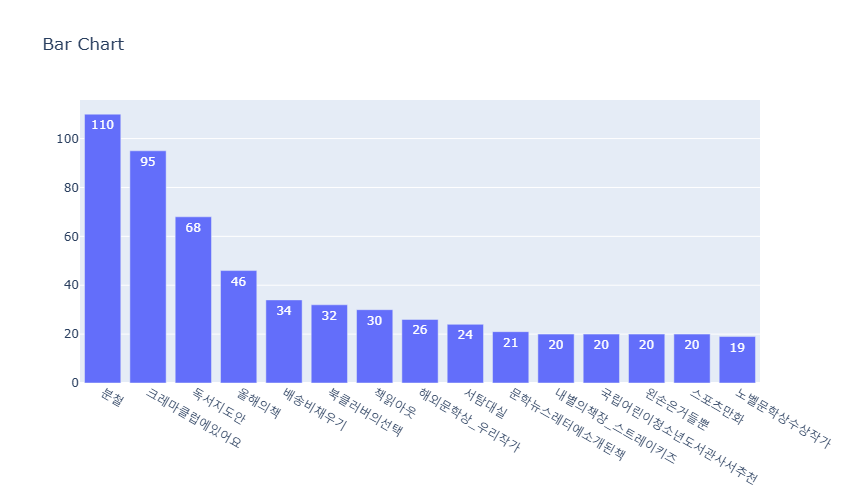

In [190]:
A = go.Bar(x = df_tags["해시태그"], y= df_tags["빈도수"], text = df_tags["빈도수"])      # 막대그래프를 만든다

data = [A]                          # 리스트를 만들어서 A를 넣는다 <<  여러개 그릴 경우에 data = [A, B] 이런식으로 쓰기위해
layout = go.Layout(title = "Bar Chart", width = 700, height = 500)       # 레이아웃 적절히 설정해 도화지 만듦

fig = go.Figure(data, layout)
fig.show()

In [181]:
Counter(df["작가"])

Counter({'이노우에 다케히코 글그림': 20,
         '해커스 어학연구소': 17,
         'David Cho': 15,
         'ETS': 14,
         '스즈키 유우토 글그림': 13,
         '한강': 12,
         '편집부': 12,
         '마츠모토 나오야 글그림/유유리 역': 11,
         '한날 글그림': 9,
         '홍민정 글/김재희 그림': 6,
         '최설희 글/한현동 그림/정수영 편': 6,
         '이꽃님': 5,
         '이현 글/오윤화 그림': 4,
         '유시민': 4,
         '이지은 글그림': 4,
         '안녕달 글그림': 4,
         '흔한남매 원저/백난도 글/유난희 그림/흔한컴퍼니 감수': 4,
         '양귀자': 3,
         '김재훈 글그림/서정욱 글': 3,
         '최진영': 3,
         '최태성': 3,
         '이은경': 3,
         '채사장': 3,
         '나태주': 3,
         '정선근': 3,
         '알베르 까뮈 저/김화영 역': 3,
         '조승우': 3,
         '김초엽': 3,
         '최숙희 글그림': 3,
         '고명환': 3,
         '슈뻘맨 원저/서후 글/류수형 그림/샌드박스 네트워크, 정재형 감수': 3,
         '김혜정': 3,
         '조선미': 3,
         '이기주': 3,
         '바딤 젤란드 저/박인수 역': 3,
         '표도르 도스토예프스키 저/김연경 역': 3,
         '성정일': 3,
         '추공 원저/장성락(REDICE STUDIO) 글그림': 3,
         '존 윌리엄스 저/김승욱 역': 2,
         '데일 카네기 

In [240]:
# 등장 횟수가 많은 순으로 정렬
sorted_auth = sorted(Counter(df["작가"]).items(), key=lambda x: x[1], reverse=True)

# DataFrame으로 변환 (선택 사항)
import pandas as pd
df_auth = pd.DataFrame(sorted_auth, columns=["작가", "빈도수"])

df_auth = df_auth.head(15)
print(df_auth)


                    작가  빈도수
0        이노우에 다케히코 글그림   20
1            해커스 어학연구소   17
2            David Cho   15
3                  ETS   14
4          스즈키 유우토 글그림   13
5                   한강   12
6                  편집부   12
7   마츠모토 나오야 글그림/유유리 역   11
8               한날 글그림    9
9         홍민정 글/김재희 그림    6
10  최설희 글/한현동 그림/정수영 편    6
11                 이꽃님    5
12         이현 글/오윤화 그림    4
13                 유시민    4
14             이지은 글그림    4


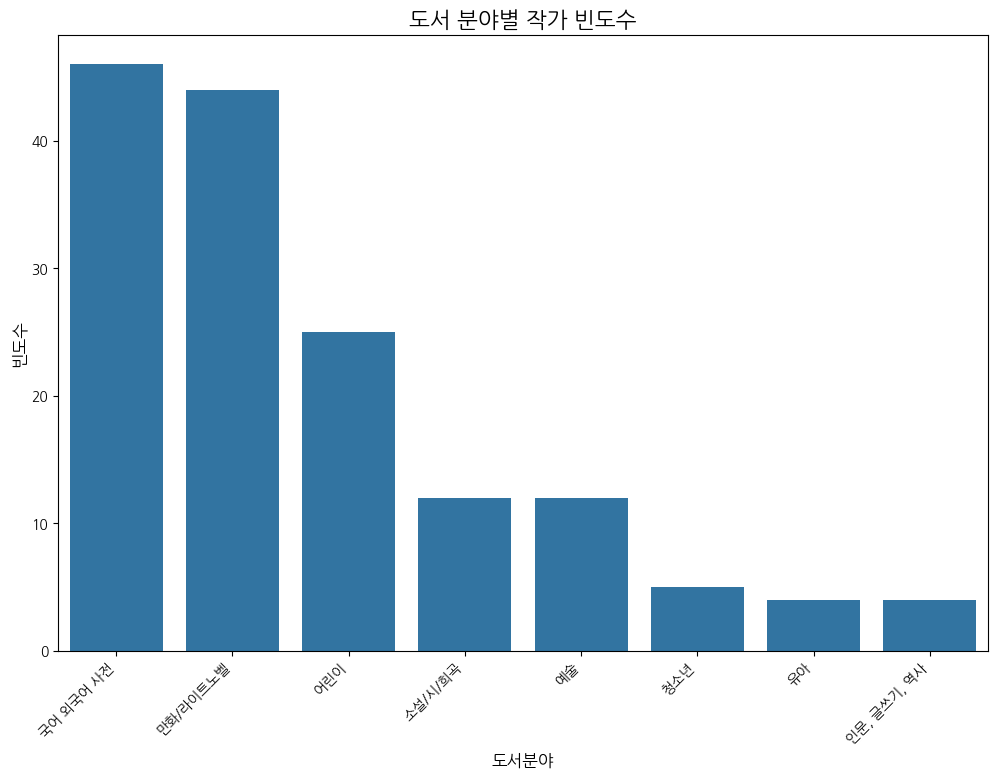

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 생성
data = {
    '작가': ['이노우에 다케히코 글그림', '해커스 어학연구소', 'David Cho', 'ETS', '스즈키 유우토 글그림',
            '한강', '편집부', '마츠모토 나오야 글그림/유유리 역', '한날 글그림', '홍민정 글/김재희 그림',
            '최설희 글/한현동 그림/정수영 편', '이꽃님', '이현 글/오윤화 그림', '유시민', '이지은 글그림'],
    '빈도수': [20, 17, 15, 14, 13, 12, 12, 11, 9, 6, 6, 5, 4, 4, 4],
    '도서분야': ['만화/라이트노벨', '국어 외국어 사전', '국어 외국어 사전', '국어 외국어 사전', '만화/라이트노벨',
                '소설/시/희곡', '예술', '만화/라이트노벨', '어린이', '어린이', '어린이', '청소년',
                '어린이', '인문, 글쓰기, 역사', '유아']
}

# 데이터프레임 생성
df_auth = pd.DataFrame(data)

# 분야별로 빈도수 합산 후 내림차순 정렬
df_field = df_auth.groupby('도서분야').agg({'빈도수': 'sum'}).reset_index()
df_field = df_field.sort_values(by='빈도수', ascending=False)  # 빈도수 기준 내림차순 정렬


# 각 분야에 맞는 색상 리스트 생성
colors = df_field['도서분야'].map(color_map)


# 시각화
plt.figure(figsize=(12, 8))

# 막대그래프
sns.barplot(data=df_field, x="도서분야", y="빈도수")

# 제목 및 축 라벨 설정
plt.title("도서 분야별 작가 빈도수", fontsize=16)
plt.xlabel("도서분야", fontsize=12)
plt.ylabel("빈도수", fontsize=12)
plt.xticks(rotation=45, ha='right')


# 그래프 표시
plt.show()


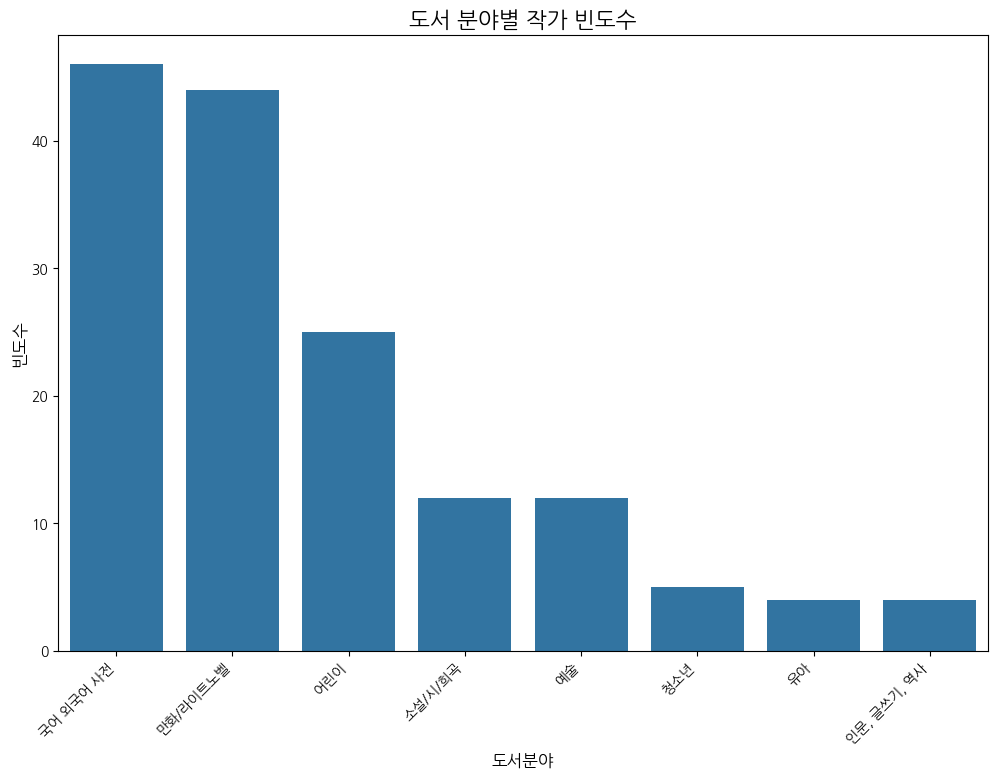

In [273]:
# 시각화
plt.figure(figsize=(12, 8))

# 막대그래프
barplot = sns.barplot(data=df_field, x="도서분야", y="빈도수")


# 제목 및 축 라벨 설정
plt.title("도서 분야별 작가 빈도수", fontsize=16)
plt.xlabel("도서분야", fontsize=12)
plt.ylabel("빈도수", fontsize=12)
plt.xticks(rotation=45, ha='right')

# 그래프 표시
plt.show()


In [300]:
df["순위"]

0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: 순위, Length: 1000, dtype: int64

In [307]:
df.groupby('출판일')['순위'].mean().reset_index().sort_values(by='순위', ascending=True)

,출판일,순위
76,2013년 11월,4.0
56,2011년 11월,11.0
87,2015년 01월,16.0
31,2006년 12월,22.0
95,2015년 11월,28.0
...,...,...
38,2008년 08월,940.0
24,2005년 01월,945.0
105,2016년 10월,948.0
78,2014년 02월,980.0


In [308]:
avg_rank_by_year  = df.groupby('출판일')['순위'].mean().reset_index().sort_values(by='순위', ascending=True)

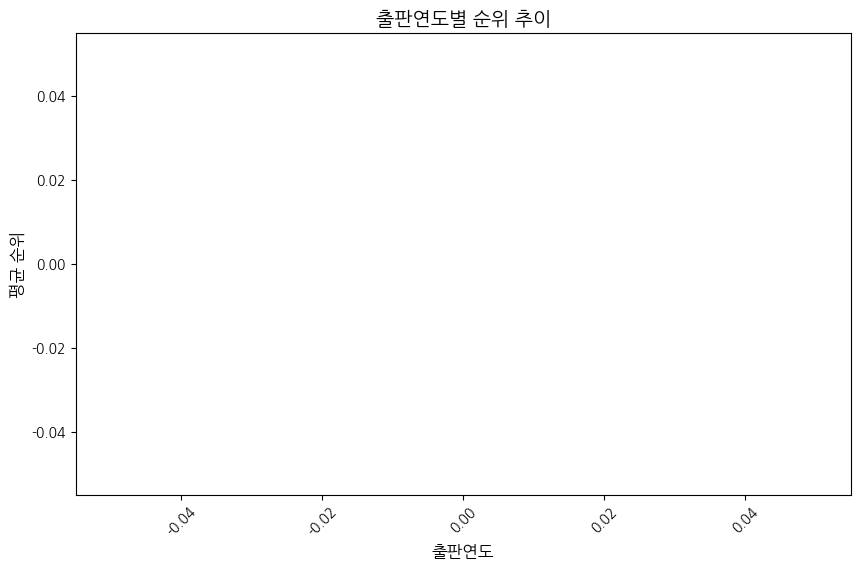

In [313]:
# 출판일 기준으로 오름차순 정렬 후 평균 순위 계산
avg_rank_by_year = df.groupby('출판일')['순위'].mean().reset_index()

# 출판일과 순위를 모두 오름차순으로 정렬
avg_rank_by_year = avg_rank_by_year.sort_values(by=['출판일', '순위'], ascending=[True, True])

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_rank_by_year, x='출판일', y='순위', marker='o')
plt.title("출판연도별 순위 추이", fontsize=14)
plt.xlabel("출판연도", fontsize=12)
plt.ylabel("평균 순위", fontsize=12)
plt.xticks(rotation=45)  # x축 라벨 각도 조정
plt.show()


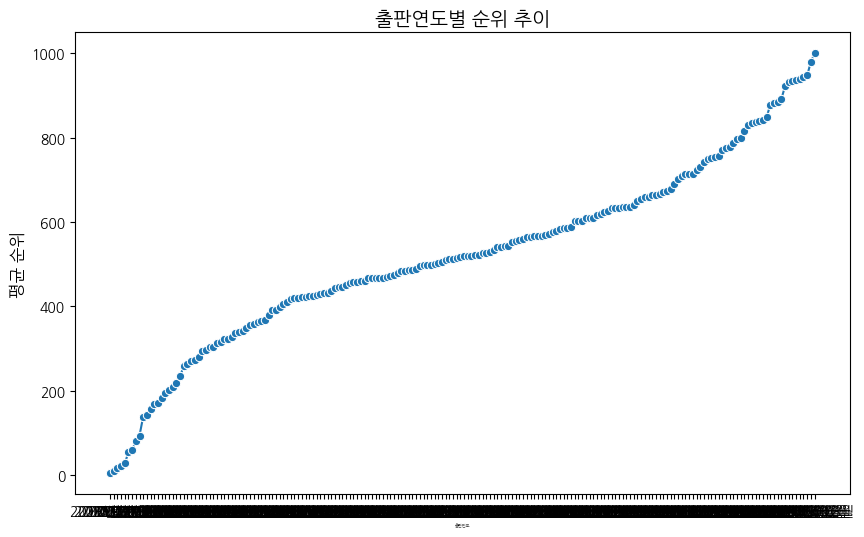

In [309]:
avg_rank_by_year  = df.groupby('출판일')['순위'].mean().reset_index().sort_values(by='순위', ascending=True)
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_rank_by_year, x='출판일', y='순위', marker='o')
plt.title("출판연도별 순위 추이", fontsize=14)
plt.xlabel("출판연도", fontsize=3)
plt.ylabel("평균 순위", fontsize=12)
plt.show()

In [290]:
df

,제목,작가,출판일,리뷰수,별점,해시태그,링크,순위
0,소년이 온다,한강,2014년 05월,"3,725",9.7,#해외문학상_우리작가\n#노벨문학상수상작가\n#가을에어울리는책\n#알쓸범잡\n#KB...,https://www.yes24.com/Product/Goods/13137546,0
1,채식주의자,한강,2022년 03월,"1,477",9.1,#노벨문학상수상작가\n#뉴욕타임즈_21세기_100대도서\n#해외문학상_우리작가\n#...,https://www.yes24.com/Product/Goods/108422348,1
2,작별하지 않는다,한강,2021년 09월,"1,921",9.6,#스트레이키즈현진이읽은책\n#내별의책장_스트레이키즈\n#노벨문학상수상작가\n#202...,https://www.yes24.com/Product/Goods/103495056,2
3,서랍에 저녁을 넣어 두었다,한강,2013년 11월,719,9.7,#해외문학상_우리작가\n#노벨문학상수상작가\n#가을에시한편\n#시시한게좋아\n#숲속...,https://www.yes24.com/Product/Goods/11467936,3
4,흰,한강 저/최진혁 사진,2018년 04월,578,9.7,#해외문학상_우리작가\n#노벨문학상수상작가\n#부커상후보작\n#해외에서인기있는한국소설,https://www.yes24.com/Product/Goods/60524285,4
...,...,...,...,...,...,...,...,...
995,나와 너의 365일,유이하 저/김지연 역,2023년 03월,59,9.8,#봄날엔로맨스,https://www.yes24.com/Product/Goods/117945784,995
996,어린이 훈민정음 3-2,성정일,2018년 08월,117,9.8,#분철,https://www.yes24.com/Product/Goods/64088226,996
997,못 참는 아이 욱하는 부모 (50만 부 발매 기념 리커버 에디션),오은영,2016년 05월,"1,422",9.7,#올해의책\n#가족관계심리학\n#화내지않고아이키우기\n#부모교육\n#자녀교육,https://www.yes24.com/Product/Goods/26031499,997
998,스즈키 바이올린 교본 4,편집부,2011년 08월,90,9.8,#악기,https://www.yes24.com/Product/Goods/5533358,998


In [258]:
df[df["작가"] == "이지은 글그림"]

,제목,작가,출판일,리뷰수,별점,해시태그,링크,순위
241,친구의 전설,이지은 글그림,2023년 11월,334,9.9,#독서지도안\n#라키비움J블루수록도서\n#친구관계\n#우정\n#베스트셀러후속작,https://www.yes24.com/Product/Goods/123776471,241
346,이파라파냐무냐무,이지은 글그림,2020년 06월,299,9.9,#독서지도안\n#라키비움J수록도서\n#MD의구매리스트\n#책읽아웃\n#볼로냐라가치상수상작,https://www.yes24.com/Product/Goods/90461037,346
465,팥빙수의 전설,이지은 글그림,2019년 06월,277,9.8,#라키비움J블루수록도서\n#독서지도안\n#여름맛\n#라키비움J수록도서\n#여름그림책,https://www.yes24.com/Product/Goods/74806358,465
535,[예스리커버] 태양 왕 수바: 수박의 전설,이지은 글그림,2023년 05월,194,9.9,#라키비움J블루수록도서\n#예스리커버\n#여름그림책\n#계절그림책\n#모험과전설,https://www.yes24.com/Product/Goods/118804984,535


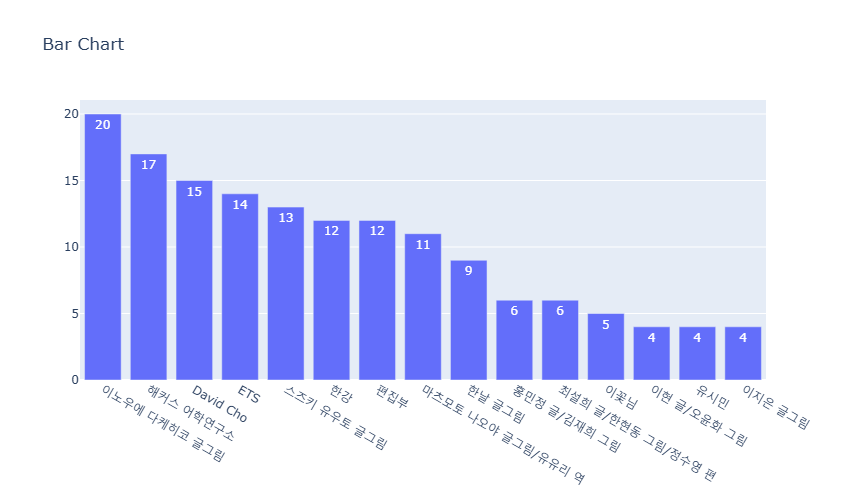

In [193]:
A = go.Bar(x = df_auth["작가"], y= df_auth["빈도수"], text = df_auth["빈도수"])      # 막대그래프를 만든다

data = [A]                          # 리스트를 만들어서 A를 넣는다 <<  여러개 그릴 경우에 data = [A, B] 이런식으로 쓰기위해
layout = go.Layout(title = "Bar Chart", width = 700, height = 500)       # 레이아웃 적절히 설정해 도화지 만듦

fig = go.Figure(data, layout)
fig.show()

In [243]:
df[df["작가"] == "이노우에 다케히코 글그림"]

,제목,작가,출판일,리뷰수,별점,해시태그,링크,순위
768,슬램덩크 신장재편판 1,이노우에 다케히코 글그림,2018년 08월,465,9.8,#ReadWithMe_스타추천도서\n#왼손은거들뿐\n#스포츠만화\n#90년대_만화책,https://www.yes24.com/Product/Goods/62921516,768
781,슬램덩크 신장재편판 2,이노우에 다케히코 글그림,2018년 08월,389,9.9,#왼손은거들뿐\n#스포츠만화,https://www.yes24.com/Product/Goods/62921720,781
820,슬램덩크 신장재편판 6,이노우에 다케히코 글그림,2018년 08월,342,9.9,#왼손은거들뿐\n#스포츠만화,https://www.yes24.com/Product/Goods/62921999,820
839,슬램덩크 신장재편판 7,이노우에 다케히코 글그림,2018년 09월,335,9.8,#왼손은거들뿐\n#스포츠만화\n#농구\n#스포츠물\n#전설의레전드,https://www.yes24.com/Product/Goods/64338569,839
840,슬램덩크 신장재편판 20,이노우에 다케히코 글그림,2018년 11월,350,9.9,#왼손은거들뿐\n#스포츠만화\n#농구\n#스포츠물\n#전설의레전드,https://www.yes24.com/Product/Goods/66360837,840
849,슬램덩크 신장재편판 3,이노우에 다케히코 글그림,2018년 08월,376,9.9,#왼손은거들뿐\n#스포츠만화,https://www.yes24.com/Product/Goods/62921746,849
851,슬램덩크 신장재편판 4,이노우에 다케히코 글그림,2018년 08월,325,9.8,#왼손은거들뿐\n#스포츠만화,https://www.yes24.com/Product/Goods/62921895,851
854,슬램덩크 신장재편판 5,이노우에 다케히코 글그림,2018년 08월,335,9.9,#왼손은거들뿐\n#스포츠만화,https://www.yes24.com/Product/Goods/62921950,854
860,슬램덩크 신장재편판 12,이노우에 다케히코 글그림,2018년 10월,311,9.9,#왼손은거들뿐\n#스포츠만화\n#농구\n#스포츠물\n#전설의레전드,https://www.yes24.com/Product/Goods/64724562,860
861,슬램덩크 신장재편판 19,이노우에 다케히코 글그림,2018년 11월,307,9.9,#왼손은거들뿐\n#스포츠만화\n#농구\n#스포츠물\n#전설의레전드,https://www.yes24.com/Product/Goods/66360835,861


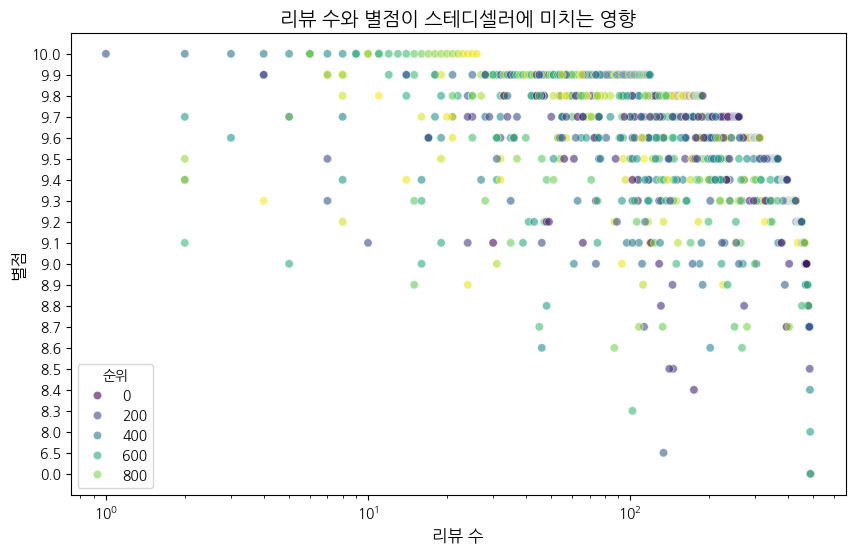

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns

# 10.0인 별점을 마지막으로 배치하기 위해 분리
df_10 = df[df["별점"] == "10.0"]  # 별점이 10.0인 데이터
df_others = df[df["별점"] != "10.0"]  # 나머지 데이터

# 나머지 데이터를 내림차순으로 정렬
df_sorted = df_others.sort_values(by="별점", ascending=False)

# 10.0인 별점 데이터를 맨 마지막에 추가
df_sorted = pd.concat([df_10, df_sorted])

# 인덱스를 순위로 사용하여 데이터 시각화
df_sorted['순위'] = df_sorted.index  # 인덱스를 '순위'로 설정

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 산점도 그리기 (인덱스를 색상으로 표시)
sns.scatterplot(data=df_sorted, x="리뷰수", y="별점", hue="순위", palette="viridis", alpha=0.6)

# 제목 및 축 라벨 설정
plt.title("리뷰 수와 별점이 스테디셀러에 미치는 영향", fontsize=14)
plt.xlabel("리뷰 수", fontsize=12)
plt.ylabel("별점", fontsize=12)

# 로그 스케일 적용 (리뷰 수가 편차가 클 경우)
plt.xscale("log")

# 색상 범례 추가
plt.legend(title="순위")

# 그래프 표시
plt.show()
